# ANALIZA PODATKOV O VIDEO IGRAH

## - Andraž Čepič, 14. 2. 2020

## Povzetek

Analizirali smo osnovne podatke o video igrah, katere smo pobrali s strani Metacritic. Zanimala nas je uspešnost različnih žanrov iger, platform, studijev in založb. Hkrati pa smo si postavili nekaj vprašanj kot je uspešnost različnih žanrov iger in platform, potem pa smo postavili hipoteze.

## TBA: rezultati in ugotovitve

---

## Uvod

Podatke smo pridobili s strani Metacritic po vrsti od najboljšjih k slabšim, in sicer https://www.metacritic.com/browse/games/score/userscore/all/all/filtered?sort=desc

Vzorec vsebuje 5000 naslovov, posamezni podatki za posamezen naslov pa so:
* Naslov igre
* Platforma igre
* Leto izida igre
* Založba igre
* Studio, ki je igro razvil
* Metascore ocena igre(profesionalni kritiki)
* Ocena splošnih uporabnikov
* ESRB rating igre
* Žanri igre

Pred analizo smo zastavili vprašanja:
* Kateri so najbolj uspešni žanri iger po ocenah vseh?
* Katere so najbolj uspešne platforme v zgodovini?
* Kateri so najbolj uspešni studiji in založbe iger po kvaliteti del?
* Ali je ESRB rating povezan s kvaliteto igre?
* Ali se ocene kritikov vidno razlikujejo od ocen splošnih uporabnikov?

Za te pa smo postavili hipoteze:
* Najbolj uspešen žanr iger po ocenah vseh je RPG,
* Najuspešnejše tri platforme so PC, PS4 in Nintendo WII,
* Najuspešnejši studijo in založba po kvaliteti je Nintendo,
* Ne, ESRB ni povezan s kvaliteto,
* Da, ocene kritikov se pogosto vidno razlikujejo od ocen uporabnikov.

### Opomba!
Razlikovali smo vnose po platformah, čeprav gre lahko za isti naslov, 
saj so ocene in izkušnje zelo različne glede na platformo, 
včasih pa je celo igra čisto drugačna, čeprav nosi isti naslov.
Znani primeri:
(Tu uporabimo nekaj angleških izrazov, da ni dvoumnosti pomena)
* GTA IV - slab port iz konzol na PC
* Chrono Trigger - spet slab port/remaster na PC
* Dark Souls - zelo slab FPS v Blightown lokaciji na Xbox 360
* Need For Speed Underground 2 - čisto druga igra na Nintendo DS kot drugje!

---

## Nastavlanje podatkovne strukture in okolja

Vključitev knjižic, ki jih potrebujemo za analizo podatkov. Uporabljali smo knjižici Pandas in Matplotlib.

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

Prebermo osnovne podatke v objekt data, ki ga bomo od zdaj naprej uporabljali za analizo.
Podatke o žanrih pa shranimo v objekt genres.

In [160]:
data = pd.read_csv("data/games.csv")
genres = pd.read_csv("data/genres.csv")

Spremenimo polje 'user_score' iz tipa float v tip int in pomnožimo z 10, da sta polji 'metascore' in 'user_score' bolje primerljivi.

Ni bilo napak, torej so bili vsi vnosti tega polja števila, zato ni treba več popravljati tega polja.

In [161]:
data['user_score'] = data['user_score'].apply(lambda x: int(x * 10))

Odstranimo neveljavne vnose.

Te so:
* metascore in user_score nista števili
* Imamo NA / NaN vnose

In [162]:
data = data[data['metascore'].astype(str).str.isdigit()].dropna()

Dodamo stolpec za leto izida posamezne igre, ki smo ga razbrali iz datuma.
Ogledamo si trenuten izgled tabele podatkov preden začnemo z analizo.

In [163]:
data['year'] = data.date.astype(str).str.slice(start=-4)
data.sort_values('year')

,title,platform,date,publisher,developer,metascore,user_score,esrb,year
3104,Quake,PC,Jun_22_1996,id Software,id Software,94,88,M,1996
2958,Pilotwings 64,Nintendo 64,Sep_29_1996,Nintendo,Paradigm Entertainment,80,81,E,1996
1086,Duke Nukem 3D,PC,Jan_29_1996,GT Interactive,3D Realms,89,87,M,1996
921,Diablo,PC,Dec_31_1996,Blizzard Entertainment,Blizzard Entertainment,94,87,M,1996
599,Circle of Blood,PC,Sep_30_1996,Virgin Interactive,Revolution Software,80,83,K-A,1996
...,...,...,...,...,...,...,...,...,...
821,Days Gone,PlayStation 4,Apr_26_2019,Sony Interactive Entertainment,Sony Bend,71,80,M,2019
4643,VA-11 Hall-A: Cyberpunk Bartender Action,Switch,May__2_2019,Ysbryd Games,Sukeban Games,84,79,M,2019
1967,Kingdom Hearts III,PlayStation 4,Jan_29_2019,Square Enix,Square Enix,83,81,E10+,2019
3199,Resident Evil,Switch,May_21_2019,Capcom,Capcom,80,84,M,2019


---

## Metascore proti ocenam uporabnikov

Tu primerjamo ocene profesionalnih ocenjevalcev, ki so shranjene v stolpcu 'metascore', z ocenam splošnih uporabnikov, ki so v stolpcu 'user_score'.

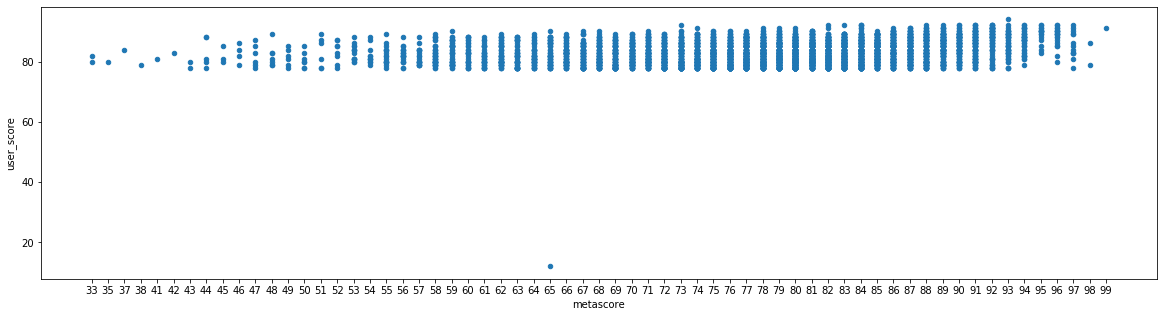

In [164]:

data.sort_values('metascore').plot.scatter('metascore', 'user_score', figsize=(20,5))

Na grafu se hitro vidi, da so ocene uporabnikov skoraj vedno zelo visoke in so same razlike bolj subtilne, vendar pa vidimo, da so ocene kritikov bolj razpršene. To pa ni začudojoče, saj je kritikov veliko manj kot je splošnih uporabnikov.
Zato bomo zožili interval ocen uporabnikov, da dobimo natančnejšo sliko.

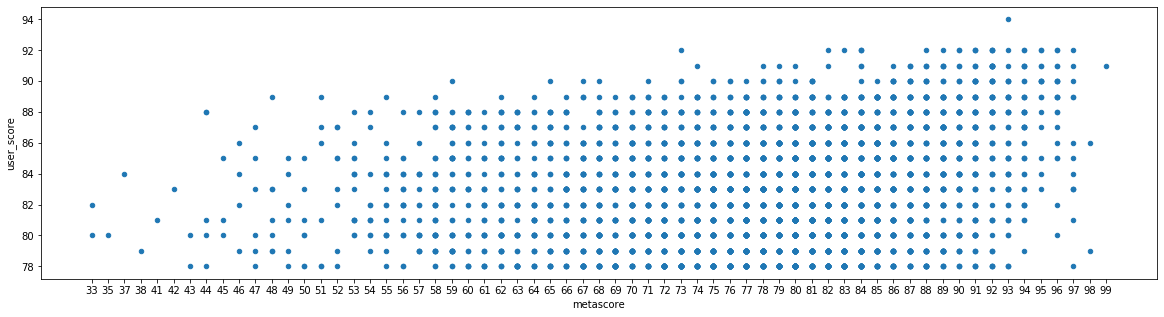

In [165]:
data[data['user_score'] >= 70].sort_values(
    'metascore'
).plot.scatter(
    'metascore', 'user_score', figsize=(20,5)
)

Zdaj bolje vidimo, da se ocene uporabnikov in kritikov sploh ne ujemjo dobro, saj hitro vidimo, da imajo na primer dobre ocene kritikov cel spekter slabih ocen do dobrih ocen uporabnikov.

Tedaj smo torej potrdili hipotezo, da se ocene uporabnikov vidno ne ujemajo z ocenami kritikov, saj bi drugače v nekem približku imeli neko funkcijo, ki bi oisovala razmerje teh dveh.

### Posledice:
Ker se ocene ne ujemajo dobro, bomo od zdaj naprej podatke analizirali posebej z metriko ocen uporabnikov in z metriko ocen kritikov, nato pa bomo še posebej prikazali povprečne rezultate obeh skupaj.

---

## Založbe in studiji

Tedaj bomo analizirali katere založbe in kateri studiji so v zgodovini izdajali oziroma ravijali najkvalitetnejše igre.
Oceni bomo pretvorili v tip float, da lahko izračunamo povprečje.


In [166]:
# Metascore
stud_zal_metascore = data[['publisher', 'developer', 'metascore', 'year']]
stud_zal_metascore['metascore'] = stud_zal_metascore['metascore'].apply(lambda x: float(x))

dev_m = stud_zal_metascore.groupby(
    'developer'
).mean(
).sort_values(
    'metascore', ascending=False
)

pub_m = stud_zal_metascore.groupby(
    'publisher'
).mean(
).sort_values(
    'metascore', ascending=False
)

# User score
stud_zal_userscore = data[['publisher', 'developer', 'user_score', 'year']]
stud_zal_userscore['user_score'] = stud_zal_userscore['user_score'].apply(lambda x: float(x))

dev_u = stud_zal_userscore.groupby(
    'developer'
).mean(
).sort_values(
    'user_score', ascending=False
)

pub_u = stud_zal_userscore.groupby(
    'publisher'
).mean(
).sort_values(
    'user_score', ascending=False
)

### Rezultati za Metascore:

In [167]:
dev_m.head(5)

,metascore
developer,
Rockstar Games,97.0
Bungie Software,96.0
"Irrational Games, 2K Marin",96.0
MPS Labs,94.0
"Digital Extremes, 2K Marin",94.0


In [168]:
pub_m.head(5)

,metascore
publisher,
id Software,94.0
2D Boy,94.0
MicroProse,94.0
tobyfox,93.0
Number None Inc.,93.0


Ugotovili smo, da je po ocenah kritikov najuspešnejša založba id Software, najuspešneji razvijalec pa Rockstar games, kar ovrže našo hipotezo s strani ocen kritikov.

Poglejmo še katere so najuspešnejše igre te založbe in tega razvijalca.

In [169]:
best_pub_m = data[data['publisher'].str.match('^id Software$')]
best_dev_m = data[data['developer'].str.match('^Rockstar Games$')]

Najuspešnejše igre založbe id Software so:

In [170]:
best_pub_m.sort_values(
    'metascore'
).head(
    5
).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
Quake,PC,Jun_22_1996,id Software,id Software,94,88,M,1996


Najuspešnejše igre razvijalca Rockstar Games so:

In [171]:
best_dev_m.sort_values(
    'metascore'
).head(
    5
).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
Red Dead Redemption 2,PlayStation 4,Oct_26_2018,Rockstar Games,Rockstar Games,97,81,M,2018


Kateri pa so bili najuspešnejši v minulem desetletju?

In [172]:
dev_d_m = stud_zal_metascore[
    stud_zal_metascore.year.astype(int) >= 2000
].groupby(
    'developer'
).mean(
).sort_values(
    'metascore', ascending=False
)

pub_d_m = stud_zal_metascore[
    stud_zal_metascore.year.astype(int) >= 2000
].groupby(
    'publisher'
).mean(
).sort_values(
    'metascore', ascending=False
)

In [173]:
dev_d_m.head(5)

,metascore
developer,
DMA Design,97.0
Rockstar Games,97.0
"Irrational Games, 2K Marin",96.0
Bungie Software,96.0
"Digital Extremes, 2K Marin",94.0


In [174]:
pub_d_m.head(5)

,metascore
publisher,
2D Boy,94.0
tobyfox,93.0
Number None Inc.,93.0
Rare Ltd.,92.0
Matt Makes Games Inc.,92.0


V minulem desetletju pa je bila najuspešnejša založba 2D Boy, najuspešnejši studio pa DMA Design.
Poglejmo še njihove največje izdaje.

In [175]:
deset = data[data['year'].astype(int) >= 2000]
best_pub_d_m = deset[deset['publisher'].str.match('^2D Boy$')]
best_dev_d_m = deset[deset['developer'].str.match('^DMA Design$')]

Najuspešnejše igre založbe 2D Boy v minulem desetletju so:

In [176]:
best_pub_d_m.sort_values(
    'metascore'
).head(
    5
).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
World of Goo,Wii,Oct_13_2008,2D Boy,2D Boy,94,87,E,2008


Najuspešnejše igre razvijalca DMA Design v minulem desetletju pa so:

In [177]:
best_dev_d_m.sort_values(
    'metascore'
).head(
    5
).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
Grand Theft Auto III,PlayStation 2,Oct_22_2001,Rockstar Games,DMA Design,97,84,M,2001


### Rezultati ocen uporabnikov:

In [178]:
dev_u.head(5)

,user_score
developer,
The Counter-Strike Team,92.0
"Looking Glass Studios, Irrational Games",91.0
ARC Entertainment,91.0
Bullets,90.0
Rockstar Vancouver,90.0


In [179]:
pub_u.head(5)

,user_score
publisher,
Looking Glass Studios,91.0
Humongous Entertainment,89.0
MicroProse,89.0
JapanStudio,89.0
Working Designs,89.0


Ugotovili smo, da je po ocenah uporabnikov najuspešnejša založba Looking Glass Studios, razvijalec pa The Counter-Strike Team, kar pomeni, da smo tudi s strani uporabnikov ovrgli hipotezo, namreč da je Nintendo najuspešnejši razvijalec in založba po ocenah.

Kot prej si poglejmo še najuspešnejše igre te založbe in razvijalca.

In [180]:
best_pub_u = data[data['publisher'].str.match('^Looking Glass Studios$')]
best_dev_u = data[data['developer'].str.match('^The Counter-Strike Team$')]

Najuspešnejše igre založbe Looking Glass Studios so:

In [181]:
best_pub_u.head(5).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
System Shock 2,PC,Aug_11_1999,Looking Glass Studios,"Looking Glass Studios, Irrational Games",92,91,M,1999


Najuspešnejše igre razvijalca The Counter-Strike Team so:

In [182]:
best_dev_u.head(5).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
Counter-Strike,PC,Nov__8_2000,Sierra Entertainment,The Counter-Strike Team,88,92,M,2000


Kateri pa so bili najuspešnejši v minulem desetletju?

In [183]:
dev_d_u = stud_zal_userscore[
    stud_zal_userscore.year.astype(int) >= 2000
].groupby(
    'developer'
).mean(
).sort_values(
    'user_score', ascending=False
)

pub_d_u = stud_zal_userscore[
    stud_zal_userscore.year.astype(int) >= 2000
].groupby(
    'publisher'
).mean(
).sort_values(
    'user_score', ascending=False
)

In [184]:
dev_d_u.head(5)

,user_score
developer,
The Counter-Strike Team,92.0
ARC Entertainment,91.0
Rockstar Vancouver,90.0
Sacnoth,90.0
Looking Glass Studios,90.0


In [185]:
pub_d_u.head(5)

,user_score
publisher,
Rare Ltd.,90.0
Working Designs,89.0
SquareSoft,89.0
Team Cherry,89.0
Cinemaware,89.0


Najupsešnejša založba tega minulega desetletja s strani uporabnikov je Rare Ltd., razvijalec pa spet The Counter-Strike Team.

Za razvijalca The Counter-Strike Team pa že vemo, da je njihova edina igra izšla leta 2000, kar spada v to desetletje, zato ni potrebna ponovna analiza.

In [186]:
best_pub_d_u = deset[deset['publisher'].str.match('^Rare Ltd.$')]

Najuspešnejše igre založbe Rare Ltd. v zadnjem desetletju so:

In [187]:
best_pub_d_u.sort_values(
    'user_score'
).head(
    5
).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
Conker's Bad Fur Day,Nintendo 64,Mar__4_2001,Rare Ltd.,Rare Ltd.,92,90,M,2001


### Največje založbe in studiji po številu izdaj

Pogljemo si še katere založbe in kateri studiji so izdali največ iger v našem vzorcu.

In [188]:
prolific_pub = data.groupby(
    'publisher'
).size(
).sort_values(ascending=False)

prolific_dev = data.groupby(
    'developer'
).size(
).sort_values(ascending=False)

Založbe z največ izdanimi igrami so:

In [189]:
prolific_pub.head(5)

publisher
Nintendo    345
Sega        232
Capcom      231
SCEA        227
Ubisoft     207
dtype: int64

Največ iger je izdala založba Nintendo, kar ni preveč presenetljivo. Čeprav smo ovrgli hipotezo, da je ta založba najuspešnejšva v kvaliteti, je pa najuspešnejša v številu izdanih iger.
Poglejmo si katere so njihove najkvalitetnejše igre po ocenah metasocre in uporabnikov.

In [190]:
nintendo_m = data[
    data['publisher'].str.match('^Nintendo$')
].sort_values('metascore', ascending=False)

nintendo_u = data[
    data['publisher'].str.match('^Nintendo$')
].sort_values('user_score', ascending=False) 

Nintendo igre po Metascore metriki:

In [191]:
nintendo_m.head(5).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
The Legend of Zelda: Ocarina of Time,Nintendo 64,Nov_23_1998,Nintendo,Nintendo,99,91,E,1998
Super Mario Galaxy,Wii,Nov_12_2007,Nintendo,Nintendo,97,90,E,2007
Perfect Dark,Nintendo 64,May_22_2000,Nintendo,Rare Ltd.,97,89,M,2000
The Legend of Zelda: Breath of the Wild,Switch,Mar__3_2017,Nintendo,Nintendo,97,86,E10+,2017
Super Mario Odyssey,Switch,Oct_27_2017,Nintendo,Nintendo,97,89,E10+,2017


Nintendo igre po ocenah uporabnikov:

In [192]:
nintendo_u.head(5).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
Super Mario 64,Nintendo 64,Sep_26_1996,Nintendo,Nintendo,94,92,E,1996
Metroid Prime,GameCube,Nov_17_2002,Nintendo,Retro Studios,97,92,T,2002
Xenoblade Chronicles,Wii,Apr__6_2012,Nintendo,Monolith Soft,92,92,T,2012
Fire Emblem: Awakening,3DS,Feb__4_2013,Nintendo,Intelligent Systems,92,91,T,2013
Banjo-Kazooie,Nintendo 64,May_31_1998,Nintendo,Rare Ltd.,92,91,E,1998


Osredotočimo se na razvijalce z največ izdanimi igrami:

In [193]:
prolific_dev.head(5)

developer
Capcom            161
Nintendo           89
Telltale Games     70
EA Canada          70
Konami             58
dtype: int64

Največji razvijalec iger je torej Capcom.

Pa si poglejmo njihove igre.

In [194]:
capcom_m = data[
    data['developer'].str.match('^Capcom$')
].sort_values('metascore', ascending=False)

capcom_u = data[
    data['developer'].str.match('^Capcom$')
].sort_values('user_score', ascending=False)

Najuspešnejše igre razvijalca Capcom po Metacritic oceni so:

In [195]:
capcom_m.head(5).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
Resident Evil 4,PlayStation 2,Oct_25_2005,Capcom,Capcom,96,90,M,2005
Resident Evil 4,GameCube,Jan_11_2005,Capcom,Capcom,96,92,M,2005
The Legend of Zelda: A Link to the Past,Game Boy Advance,Dec__3_2002,Nintendo,Capcom,95,89,E,2002
Devil May Cry,PlayStation 2,Oct_16_2001,Capcom,Capcom,94,87,M,2001
Street Fighter Alpha 3,PlayStation,Apr_30_1999,Capcom,Capcom,93,86,T,1999


Pa še igre po ocenah ulporabnikov:

In [196]:
capcom_u.head(5).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
Devil May Cry 3: Dante's Awakening,PlayStation 2,Mar__1_2005,Capcom,Capcom,84,92,M,2005
Resident Evil 2,PlayStation,Jan_21_1998,Capcom,Capcom,89,92,M,1998
Resident Evil,GameCube,Apr_30_2002,Capcom,Capcom,91,92,M,2002
Resident Evil 4,GameCube,Jan_11_2005,Capcom,Capcom,96,92,M,2005
Devil May Cry 3: Special Edition,PlayStation 2,Jan_24_2006,Capcom,Capcom,87,91,M,2006


S tem smo zaključili analizo podatkov o založbah in razvijalcih iger. Ovrgli smo hipotezo, da je Nintendo najuspešnejša založba in razvijalec po ocenah uporabnikov in o ocenah kritikov.

---

## Analiza platform iger

Analizirali bomo najuspešnejše platforme po ocenah kritikov in uporabnikov posebej, na koncu pa bomo še preverili katera platforma je podpirala največ iger.

In [212]:
plat_m = data[['platform', 'metascore', 'year']]
plat_m['metascore'] = plat_m['metascore'].apply(lambda x: float(x))
plat_u = data[['platform', 'user_score', 'year']]
plat_u['user_score'] = plat_u['user_score'].apply(lambda x: float(x))

### Metascore

In [213]:
plat_m.groupby(
    'platform'
).mean(
).sort_values(
    'metascore', ascending=False
).head(5)

,metascore
platform,
Nintendo 64,84.187500
Switch,81.976285
PlayStation 4,81.842857
PlayStation,81.650000
Wii U,81.285714


Ugotovili smo, da je najuspešnejša platforma po ocenah kritikov Nintendo 64, tej pa sledita Switch in PlayStation 4. Hipotezo smo torej, s strani ocen kritikov, ovrgli, vendar pa smo vsaj zadeli, da je Playstation 4 ena izmed treh najuspešnejših platform.

Oglejmo si igre sistema Nintendo 64.

In [214]:
n64 = data[data['platform'].str.match('^Nintendo 64$')]
n64.sort_values(
    'metascore', ascending=False
).head(5).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
The Legend of Zelda: Ocarina of Time,Nintendo 64,Nov_23_1998,Nintendo,Nintendo,99,91,E,1998
Perfect Dark,Nintendo 64,May_22_2000,Nintendo,Rare Ltd.,97,89,M,2000
GoldenEye 007,Nintendo 64,Aug_25_1997,Nintendo,Rare Ltd.,96,90,T,1997
The Legend of Zelda: Majora's Mask,Nintendo 64,Oct_25_2000,Nintendo,Nintendo,95,91,E,2000
Super Mario 64,Nintendo 64,Sep_26_1996,Nintendo,Nintendo,94,92,E,1996


### Uporabniki

In [215]:
plat_u.groupby(
    'platform'
).mean(
).sort_values(
    'user_score', ascending=False
).head(5)

,user_score
platform,
PlayStation,86.220000
Nintendo 64,85.208333
PlayStation 2,84.130208
Game Boy Advance,83.994792
Dreamcast,83.753425


Pri uporabnikih pa vidimo, da zmaga originalen PlayStation, sledita mu pa Nintendo 64 in PlayStation 2. Vidimo, da je Nintendo 64 legendaren sistem iz obeh strani. Tu smo tudi ovrgli našo hipotezo, zdaj se pa nobena naša napovedana platforma ne pojavi med prvimi tremi oziroma niti med prvimi petimi.

Poglejmo igre sistema PlayStation.

In [216]:
ps = data[data['platform'].str.match('^PlayStation$')]
ps.sort_values(
    'user_score', ascending=False
).head(5).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
Xenogears,PlayStation,Oct_20_1998,Square EA,SquareSoft,84,92,T,1998
Final Fantasy VII,PlayStation,Sep__3_1997,SCEA,SquareSoft,92,92,T,1997
Final Fantasy Tactics,PlayStation,Jan_28_1998,SCEA,SquareSoft,83,92,T,1998
Resident Evil 2,PlayStation,Jan_21_1998,Capcom,Capcom,89,92,M,1998
Metal Gear Solid,PlayStation,Oct_21_1998,Konami,KCEJ,94,92,M,1998


Zmagovalni platformi sta obe stari, zato dajmo zdaj še analizirati sisteme za prejšnje desetletje.

In [221]:
plat_d_m = plat_m[plat_m['year'].astype(int) >= 2000]
plat_d_u = plat_u[plat_u['year'].astype(int) >= 2000]

### Metascore za prejšnje desetletje

In [218]:
plat_d_m.groupby(
    'platform'
).mean(
).sort_values(
    'metascore', ascending=False
).head(5)

,metascore
platform,
Nintendo 64,82.380952
Switch,81.976285
PlayStation 4,81.842857
Wii U,81.285714
PC,80.850746


Vidimo, da se tu ni nič spremenilo za top tri platforme, so se pa malo zamenjale v zadnjih dveh od petih.

### Uporabniki za prejšnje desetletje

In [219]:
plat_d_u.groupby(
    'platform'
).mean(
).sort_values(
    'user_score', ascending=False
).head(5)

,user_score
platform,
PlayStation,85.418182
Nintendo 64,84.857143
PlayStation 2,84.130208
Game Boy Advance,83.994792
Dreamcast,83.800000


Tu se tudi ni nič spremenilo.

Pogledamo igre za Nintedno 64 minulega desetletja:

In [223]:
n64_d = deset[deset['platform'].str.match('^Nintendo 64$')]
n64_d.sort_values(
    'metascore', ascending=False
).head(5).style.hide_index()


title,platform,date,publisher,developer,metascore,user_score,esrb,year
Perfect Dark,Nintendo 64,May_22_2000,Nintendo,Rare Ltd.,97,89,M,2000
The Legend of Zelda: Majora's Mask,Nintendo 64,Oct_25_2000,Nintendo,Nintendo,95,91,E,2000
Paper Mario,Nintendo 64,Feb__5_2001,Nintendo,Intelligent Systems,93,90,E,2001
Conker's Bad Fur Day,Nintendo 64,Mar__4_2001,Rare Ltd.,Rare Ltd.,92,90,M,2001
Mario Tennis,Nintendo 64,Aug_28_2000,Nintendo,Camelot Software Planning,91,88,E,2000


Zdaj pa še igre za PlayStation:

In [225]:
ps_d = deset[deset['platform'].str.match('^PlayStation$')]
ps_d.sort_values(
    'user_score', ascending=False
).head(5).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
Final Fantasy IX,PlayStation,Nov_13_2000,Square EA,SquareSoft,94,91,T,2000
The Legend of Dragoon,PlayStation,Jun_11_2000,SCEA,SCEI,74,91,T,2000
Arc the Lad Collection,PlayStation,Apr_18_2002,Working Designs,ARC Entertainment,78,91,T,2002
Final Fantasy Chronicles,PlayStation,Jun_29_2001,Square EA,TOSE,89,91,T,2001
Vagrant Story,PlayStation,May_15_2000,Square EA,SquareSoft,92,90,T,2000


### Najuspešnejše platforme po številu izdaj iger

In [227]:
data.groupby(
    'platform'
).size(
).sort_values(ascending=False).head(5)

platform
PlayStation 2    768
PC               705
Xbox 360         453
PlayStation 3    343
Xbox             311
dtype: int64

Presenetljivo vidimo, da je bilo več iger izdanih na PlayStation 2 kot na PC!

Katere so najbolje ocenjene?

In [232]:
ps2 = data[data['platform'].str.match('^PlayStation 2')]

Igre za PS2 po Metascore ocenah:

In [234]:
ps2.sort_values(
    'metascore', ascending=False
).head(5).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
Grand Theft Auto III,PlayStation 2,Oct_22_2001,Rockstar Games,DMA Design,97,84,M,2001
Resident Evil 4,PlayStation 2,Oct_25_2005,Capcom,Capcom,96,90,M,2005
Metal Gear Solid 2: Sons of Liberty,PlayStation 2,Nov_12_2001,Konami,KCEJ,96,88,M,2001
Grand Theft Auto: San Andreas,PlayStation 2,Oct_26_2004,Rockstar Games,Rockstar North,95,90,M,2004
Gran Turismo 3: A-Spec,PlayStation 2,Jul__9_2001,SCEA,Polyphony Digital,95,84,E,2001


Igre za PS2 po ocenah Uporabnikov:

In [235]:
ps2.sort_values(
    'user_score', ascending=False
).head(5).style.hide_index()

title,platform,date,publisher,developer,metascore,user_score,esrb,year
God Hand,PlayStation 2,Oct_10_2006,Capcom,Clover Studio,73,92,M,2006
Devil May Cry 3: Dante's Awakening,PlayStation 2,Mar__1_2005,Capcom,Capcom,84,92,M,2005
Ratchet & Clank: Up Your Arsenal,PlayStation 2,Nov__3_2004,SCEA,Insomniac Games,91,91,T,2004
Devil May Cry 3: Special Edition,PlayStation 2,Jan_24_2006,Capcom,Capcom,87,91,M,2006
Shadow of the Colossus,PlayStation 2,Oct_18_2005,SCEA,SCE Japan Studio,91,91,T,2005


V tem razdelku smo ugotovili, da je sta platformi s povprečno najbolje ocenjenimi igrami Nintendo 64 in PlayStation, presenetljivo pa se to ni spremenilo v zadnjem desetletju, namreč obe konzoli sta začeli 3D dobo video iger in se vidi, da so vse igre za ta dva sistema izšle okoli leta 2000, torej sta obe konzoli praktično izven minulega desetletja. Našo hipotezo o najuspešnejših platformah pa smo ovrgli.

Morda pa je še bolj presenetljivo, da ima PlayStation 2 več uradno izdanih iger kot PC. 

---

## Žanri iger